In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:\\Users\\NITHIN SYLESH\\Documents\\bda'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\NITHIN SYLESH\Documents\bda\1.jpg
C:\Users\NITHIN SYLESH\Documents\bda\2.jpg
C:\Users\NITHIN SYLESH\Documents\bda\3.jpg
C:\Users\NITHIN SYLESH\Documents\bda\5242012.pdf
C:\Users\NITHIN SYLESH\Documents\bda\fi.jpg
C:\Users\NITHIN SYLESH\Documents\bda\hm.jpg
C:\Users\NITHIN SYLESH\Documents\bda\op.jpg
C:\Users\NITHIN SYLESH\Documents\bda\op1.jpg
C:\Users\NITHIN SYLESH\Documents\bda\op2.jpg
C:\Users\NITHIN SYLESH\Documents\bda\project_report group_3.docx
C:\Users\NITHIN SYLESH\Documents\bda\project_report group_3.pdf
C:\Users\NITHIN SYLESH\Documents\bda\report.docx
C:\Users\NITHIN SYLESH\Documents\bda\sample_submission.csv
C:\Users\NITHIN SYLESH\Documents\bda\sample_submission.csv.zip
C:\Users\NITHIN SYLESH\Documents\bda\test.csv
C:\Users\NITHIN SYLESH\Documents\bda\test.csv.zip
C:\Users\NITHIN SYLESH\Documents\bda\train.csv
C:\Users\NITHIN SYLESH\Documents\bda\train.csv.zip
C:\Users\NITHIN SYLESH\Documents\bda\.ipynb_checkpoints\3 Data Science - Insurance Claims-checkpoint.ipynb

In [6]:
train=pd.read_csv('C:\\Users\\NITHIN SYLESH\\Documents\\bda\\train.csv')
test=pd.read_csv('C:\\Users\\NITHIN SYLESH\\Documents\\bda\\test.csv')
sample_submission=pd.read_csv('C:\\Users\\NITHIN SYLESH\\Documents\\bda\\sample_submission.csv')

In [7]:
print(train.shape, test.shape, sample_submission.shape)

(188318, 132) (125546, 131) (125546, 2)


In [8]:
train.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [9]:
test.head()

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont5     cont6  \
0   4    A    B    A    A    A    A    A    A    B  ...  0.281143  0.466591   
1   6    A    B    A    B    A    A    A    A    B  ...  0.836443  0.482425   
2   9    A    B    A    B    B    A    B    A    B  ...  0.718531  0.212308   
3  12    A    A    A    A    B    A    A    A    A  ...  0.397069  0.369930   
4  15    B    A    A    A    A    B    A    A    A  ...  0.302678  0.398862   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13    cont14  
0  0.317681  0.61229  0.34365  0.38016  0.377724  0.369858  0.704052  0.392562  
1  0.443760  0.71330  0.51890  0.60401  0.689039  0.675759  0.453468  0.208045  
2  0.325779  0.29758  0.34365  0.30529  0.245410  0.241676  0.258586  0.297232  
3  0.342355  0.40028  0.33237  0.31480  0.348867  0.341872  0.592264  0.555955  
4  0.391833  0.23688  0.43731  0.50556  0.359572  0.352251  0.301535  0.825823  

[5 rows x 131 columns]

In [10]:
print(f'No.of missing values in Train: {train.isnull().sum().sum()}')
print(f'No.of missing values in Test: {test.isnull().sum().sum()}')


No.of missing values in Train: 0
No.of missing values in Test: 0


In [11]:
pd.DataFrame({'Train': train.dtypes.value_counts(), 'Test': test.dtypes.value_counts()})

Train  Test
object     116   116
float64     15    14
int64        1     1

In [12]:
categories =  train.describe(include='all')
categories

id    cat1    cat2    cat3    cat4    cat5    cat6    cat7  \
count   188318.000000  188318  188318  188318  188318  188318  188318  188318   
unique            NaN       2       2       2       2       2       2       2   
top               NaN       A       A       A       A       A       A       A   
freq              NaN  141550  106721  177993  128395  123737  131693  183744   
mean    294135.982561     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
std     169336.084867     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
min          1.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
25%     147748.250000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
50%     294539.500000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
75%     440680.500000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
max     587633.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

          cat8    cat9  ...          cont6          cont7          cont8  \
count   188318  188318  ...  188318.000000  188318.000000  188318.000000   
unique       2       2  ...            NaN            NaN            NaN   
top          A       A  ...            NaN            NaN            NaN   
freq    177274  113122  ...            NaN            NaN            NaN   
mean       NaN     NaN  ...       0.490945       0.484970       0.486437   
std        NaN     NaN  ...       0.205273       0.178450       0.199370   
min        NaN     NaN  ...       0.012683       0.069503       0.236880   
25%        NaN     NaN  ...       0.336105       0.350175       0.312800   
50%        NaN     NaN  ...       0.440945       0.438285       0.441060   
75%        NaN     NaN  ...       0.655021       0.591045       0.623580   
max        NaN     NaN  ...       0.997162       1.000000       0.980200   

                cont9         cont10         cont11         cont12  \
count   188318.000000  188318.000000  188318.000000  188318.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.485506       0.498066       0.493511       0.493150   
std          0.181660       0.185877       0.209737       0.209427   
min          0.000080       0.000000       0.035321       0.036232   
25%          0.358970       0.364580       0.310961       0.311661   
50%          0.441450       0.461190       0.457203       0.462286   
75%          0.566820       0.614590       0.678924       0.675759   
max          0.995400       0.994980       0.998742       0.998484   

               cont13         cont14           loss  
count   188318.000000  188318.000000  188318.000000  
unique            NaN            NaN            NaN  
top               NaN            NaN            NaN  
freq              NaN            NaN            NaN  
mean         0.493138       0.495717    3037.337686  
std          0.212777       0.222488    2904.086186  
min          0.000228       0.179722       0.670000  
25%          0.315758       0.294610    1204.460000  
50%          0.363547       0.407403    2115.570000  
75%          0.689974       0.724623    3864.045000  
max          0.988494       0.844848  121012.250000  

[11 rows x 132 columns]

In [13]:
test.describe(include = 'all')

id    cat1    cat2    cat3    cat4    cat5    cat6    cat7  \
count   125546.000000  125546  125546  125546  125546  125546  125546  125546   
unique            NaN       2       2       2       2       2       2       2   
top               NaN       A       A       A       A       A       A       A   
freq              NaN   94096   71203  118752   86026   82282   88014  122546   
mean    294067.153442     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
std     170098.335649     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
min          4.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
25%     146414.250000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
50%     294306.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
75%     441800.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
max     587634.000000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

          cat8    cat9  ...          cont5          cont6          cont7  \
count   125546  125546  ...  125546.000000  125546.000000  125546.000000   
unique       2       2  ...            NaN            NaN            NaN   
top          A       A  ...            NaN            NaN            NaN   
freq    118112   75509  ...            NaN            NaN            NaN   
mean       NaN     NaN  ...       0.487640       0.492188       0.485945   
std        NaN     NaN  ...       0.209119       0.205574       0.178650   
min        NaN     NaN  ...       0.281143       0.012683       0.069503   
25%        NaN     NaN  ...       0.281143       0.336105       0.352087   
50%        NaN     NaN  ...       0.422268       0.441525       0.438893   
75%        NaN     NaN  ...       0.643315       0.659261       0.591284   
max        NaN     NaN  ...       0.983107       0.997162       1.000000   

                cont8          cont9         cont10         cont11  \
count   125546.000000  125546.000000  125546.000000  125546.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.487401       0.486015       0.498909       0.494360   
std          0.199549       0.182134       0.185950       0.210399   
min          0.236880       0.000080       0.000000       0.035321   
25%          0.317960       0.358970       0.364580       0.310961   
50%          0.441060       0.441450       0.466720       0.457203   
75%          0.629180       0.568890       0.619840       0.678924   
max          0.982800       0.995400       0.994980       0.997830   

               cont12         cont13         cont14  
count   125546.000000  125546.000000  125546.000000  
unique            NaN            NaN            NaN  
top               NaN            NaN            NaN  
freq              NaN            NaN            NaN  
mean         0.494033       0.495086       0.495586  
std          0.210148       0.213108       0.222613  
min          0.036232       0.000228       0.178568  
25%          0.318249       0.315758       0.294752  
50%          0.462286       0.363547       0.406104  
75%          0.682413       0.689974       0.724791  
max          0.997416       0.988494       0.844814  

[11 rows x 131 columns]

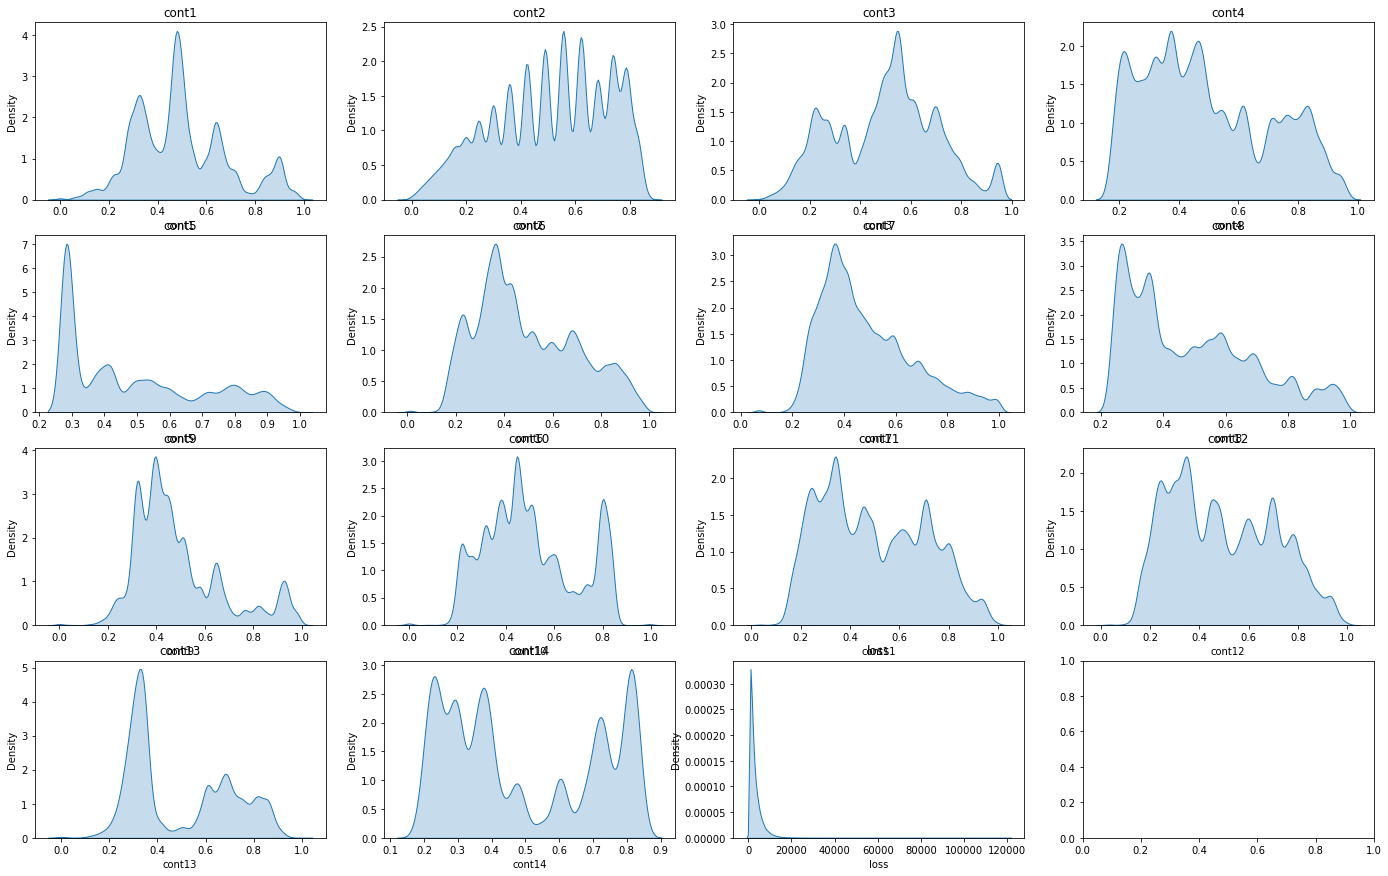

In [14]:
fig, axes = plt.subplots(4, 4, figsize=(24, 15))

for col, ax in zip(train.select_dtypes(['float64']).columns, axes.flat):
    sns.kdeplot(train[col], shade=True, ax=ax)
    ax.set_title(col)
plt.show()

<AxesSubplot:>

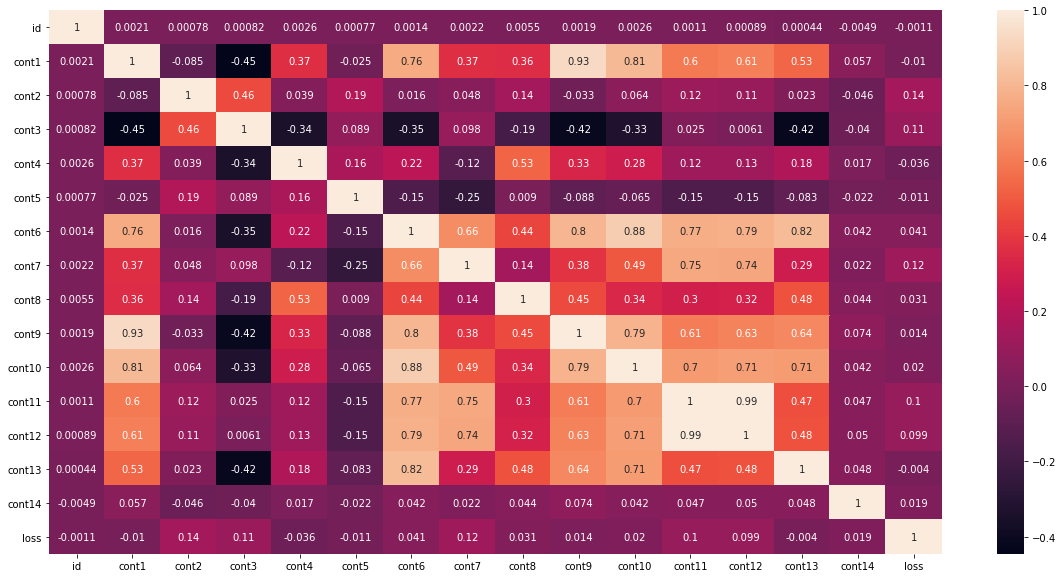

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(), annot=True)

<AxesSubplot:xlabel='loss', ylabel='Density'>

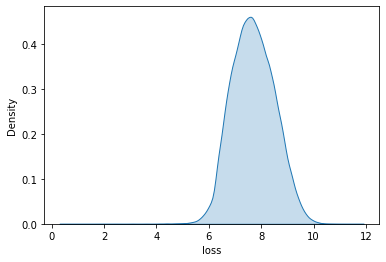

In [16]:
train['loss'] = np.log1p(train['loss'])
sns.kdeplot(train['loss'], shade=True)


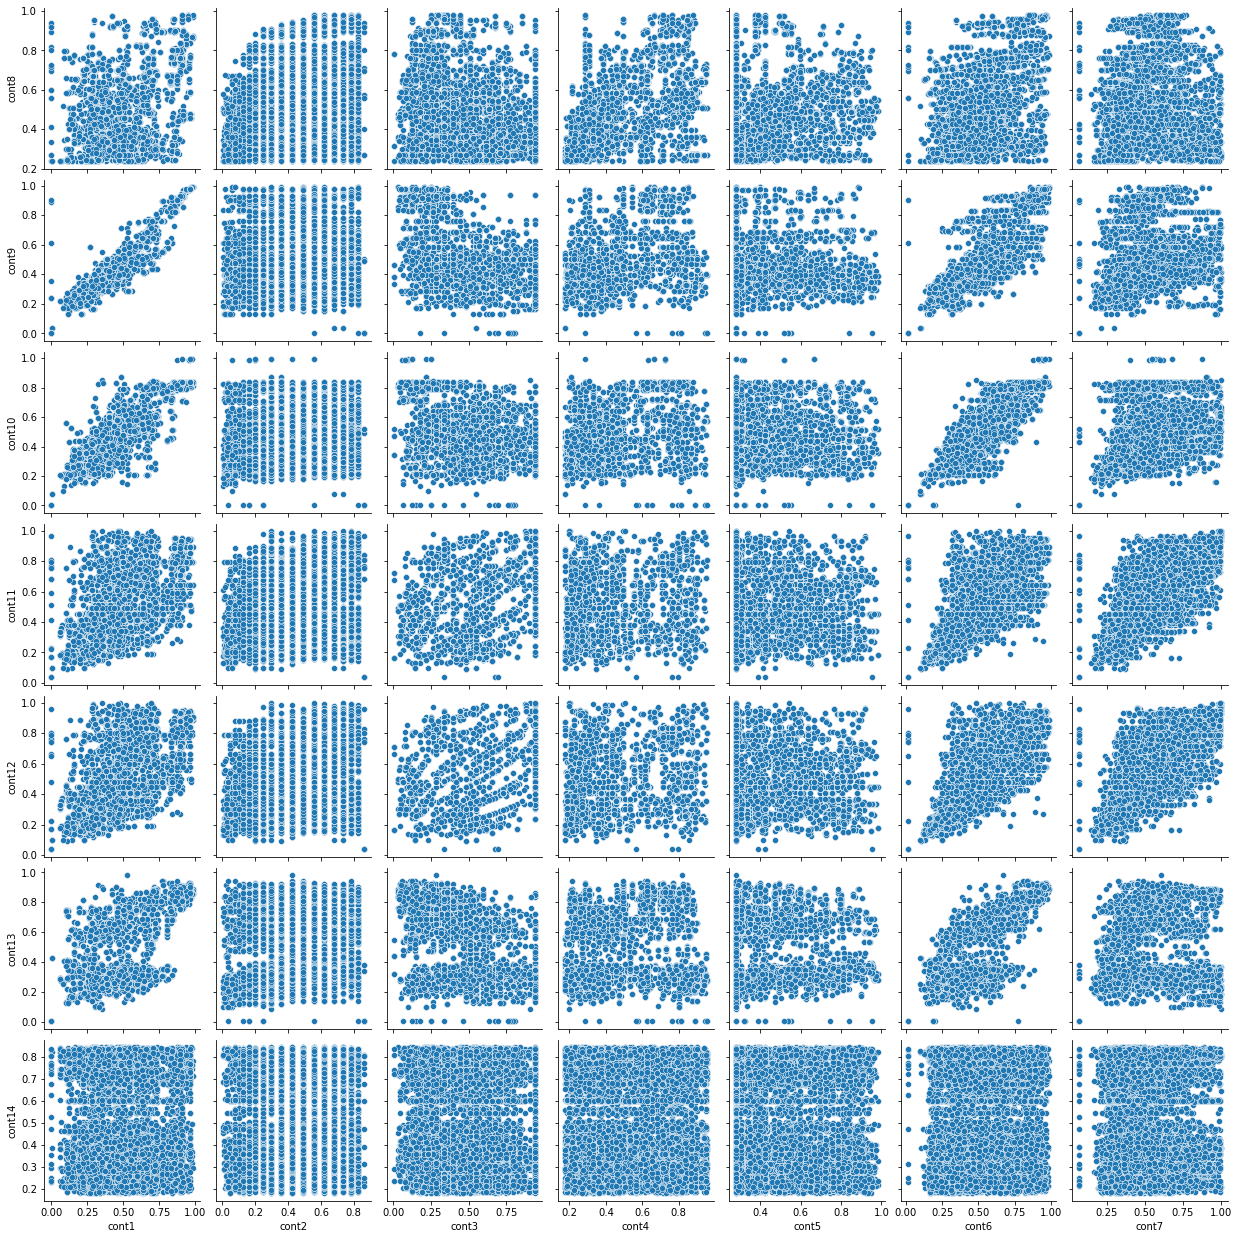

In [17]:
sns.pairplot(train.sample(frac=0.1), x_vars=['cont1', 'cont2', 'cont3', 'cont4', 'cont5','cont6', 'cont7'], y_vars=['cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14'])

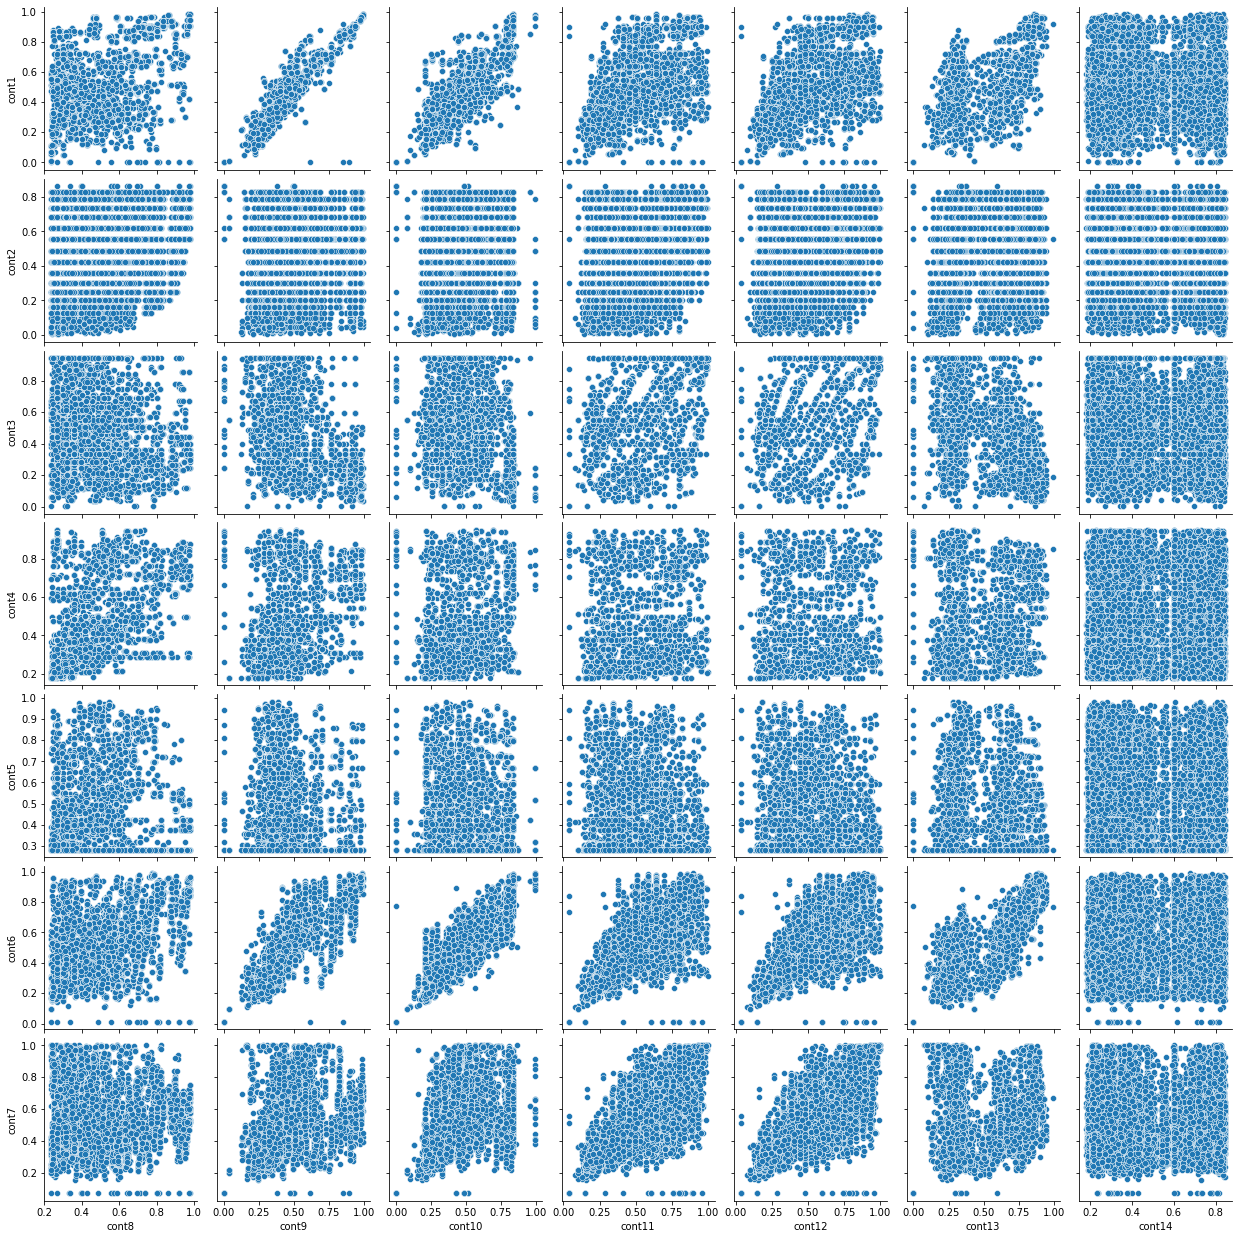

In [18]:
sns.pairplot(train.sample(frac=0.1), x_vars=['cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14'], y_vars=['cont1', 'cont2', 'cont3', 'cont4', 'cont5','cont6', 'cont7'])

C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NITHIN SYLESH\.conda\envs\torq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

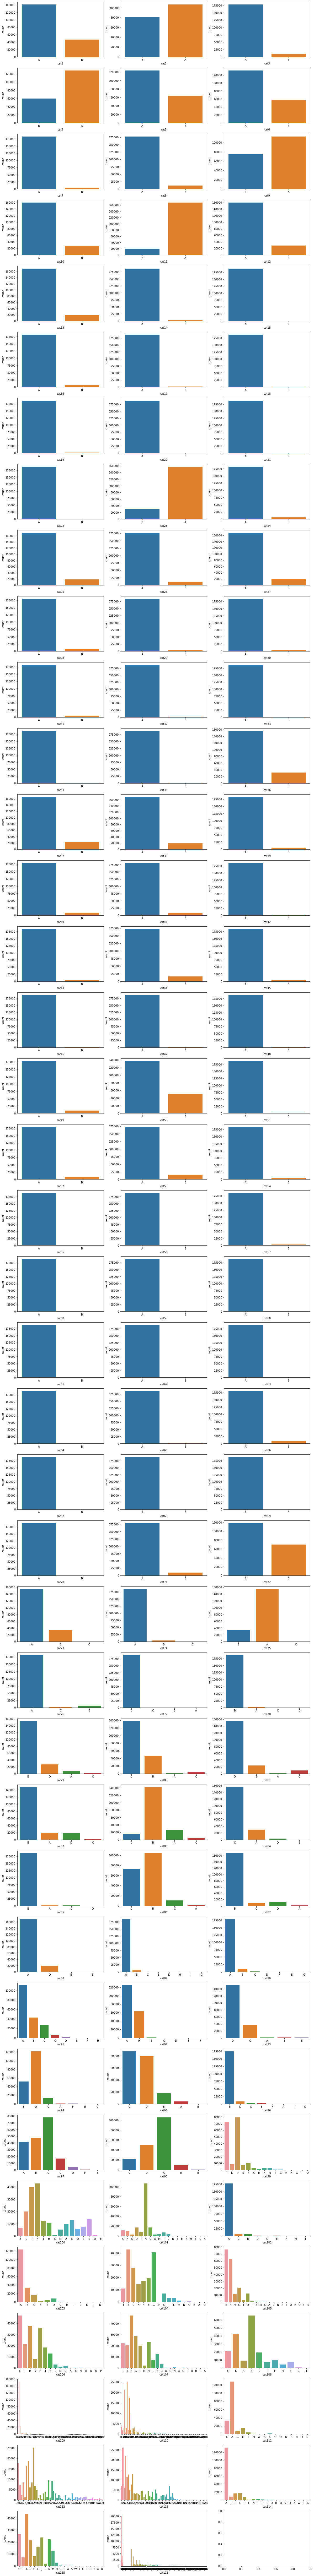

In [19]:
fig,axes = plt.subplots(39,3,figsize=(20,180))
ax = axes.flatten()

for i in range(116):
    sns.countplot(train[f'cat{i+1}'], ax=ax[i])

In [20]:
SEED = 10

In [21]:
dist_percent = np.divide(len(train), np.multiply(categories.loc['unique'].values, categories.loc['freq'].values))
percentages = pd.DataFrame({'column': categories.columns, 'percent': dist_percent})
cat_cols = list(percentages[percentages['percent'] > 0.1]['column'].values)

print(f"Filtered categories: {len(cat_cols)}")


Filtered categories: 110


In [22]:
corr = train.drop('loss', 1).corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop_num = [column for column in upper.columns if any(upper[column] > 0.6)]
num_cols = list(set(train.drop('loss', 1).select_dtypes(['float64'])) - set(to_drop_num))

In [23]:
final_tr = train[cat_cols + num_cols + ['loss']]
final_ts = test[cat_cols + num_cols]
final_tr.shape, final_ts.shape

((188318, 118), (125546, 117))

In [24]:
features = final_tr.drop('loss', 1)
target = final_tr['loss']

In [25]:
features = pd.get_dummies(features, columns=features.select_dtypes('object').columns)
features.shape

(188318, 551)

In [26]:
payload = pd.get_dummies(final_ts, columns=final_ts.select_dtypes('object').columns)
payload.shape

(125546, 550)

In [27]:
features, payload = features.align(payload, join='outer', axis=1, fill_value=0)
features.shape, payload.shape

((188318, 560), (125546, 560))

In [28]:
cols = features.columns

In [29]:
SIZE = 0.2

In [30]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(features, target, random_state=SEED, test_size=SIZE)
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=SEED, test_size=SIZE)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error, accuracy_score

In [32]:
eval_set  = [(x_val,y_val)]
model_cat = CatBoostRegressor(random_state=SEED, 
                          n_estimators=6000,
                          max_depth=3, 
                          learning_rate=0.1, 
                          loss_function='MAE', 
                          eval_metric='MAE', 
                          reg_lambda=3, 
                          verbose=100)
%time model_cat.fit(x_train, y_train, eval_set=eval_set, early_stopping_rounds=30)

0:	learn: 0.6383528	test: 0.6370360	best: 0.6370360 (0)	total: 152ms	remaining: 15m 9s
100:	learn: 0.4512687	test: 0.4544974	best: 0.4544974 (100)	total: 2.33s	remaining: 2m 16s
200:	learn: 0.4361022	test: 0.4405197	best: 0.4405197 (200)	total: 4.46s	remaining: 2m 8s
300:	learn: 0.4298469	test: 0.4348809	best: 0.4348809 (300)	total: 6.76s	remaining: 2m 7s
400:	learn: 0.4261583	test: 0.4316821	best: 0.4316821 (400)	total: 9.51s	remaining: 2m 12s
500:	learn: 0.4233575	test: 0.4292924	best: 0.4292924 (500)	total: 11.7s	remaining: 2m 7s
600:	learn: 0.4214257	test: 0.4277447	best: 0.4277447 (600)	total: 13.5s	remaining: 2m 1s
700:	learn: 0.4196023	test: 0.4263813	best: 0.4263813 (700)	total: 16.3s	remaining: 2m 3s
800:	learn: 0.4180970	test: 0.4253682	best: 0.4253682 (800)	total: 18.6s	remaining: 2m
900:	learn: 0.4167254	test: 0.4245078	best: 0.4245078 (900)	total: 20.8s	remaining: 1m 57s
1000:	learn: 0.4154721	test: 0.4237214	best: 0.4237214 (1000)	total: 22.9s	remaining: 1m 54s
1100:	lear

In [33]:
y_train_pred = model_cat.predict(x_train)
y_val_pred = model_cat.predict(x_val)
y_test_pred = model_cat.predict(x_test)


In [34]:
print(f"MAE Train: {mean_absolute_error(np.expm1(y_train_pred), np.expm1(y_train))}")
print(f"MAE Val: {mean_absolute_error(np.expm1(y_val_pred), np.expm1(y_val))}")
print(f"MAE Test: {mean_absolute_error(np.expm1(y_test_pred), np.expm1(y_test))}")

MAE Train: 1112.7886126766616
MAE Val: 1152.208612862143
MAE Test: 1154.036074405514


In [35]:
predictions = np.round(np.expm1(model_cat.predict(payload)), 2)

submission = pd.DataFrame({'id': test['id'], 'loss': pd.Series(predictions)})
submission.to_csv('submission.csv', index=False)

In [36]:
print('In Sample Score: ', model_cat.score(x_train, y_train))
print('Out Sample Score: ', model_cat.score(x_test, y_test))

In Sample Score:  0.5714541259286667
Out Sample Score:  0.5488873677948249


In [37]:
submission.head(150)

id     loss
0      4  1376.45
1      6  1667.05
2      9  9643.38
3     12  6370.48
4     15   870.53
..   ...      ...
145  623  1899.68
146  629  1497.55
147  634  1512.20
148  638   931.08
149  642   975.23

[150 rows x 2 columns]

<AxesSubplot:xlabel='Value', ylabel='Feature'>

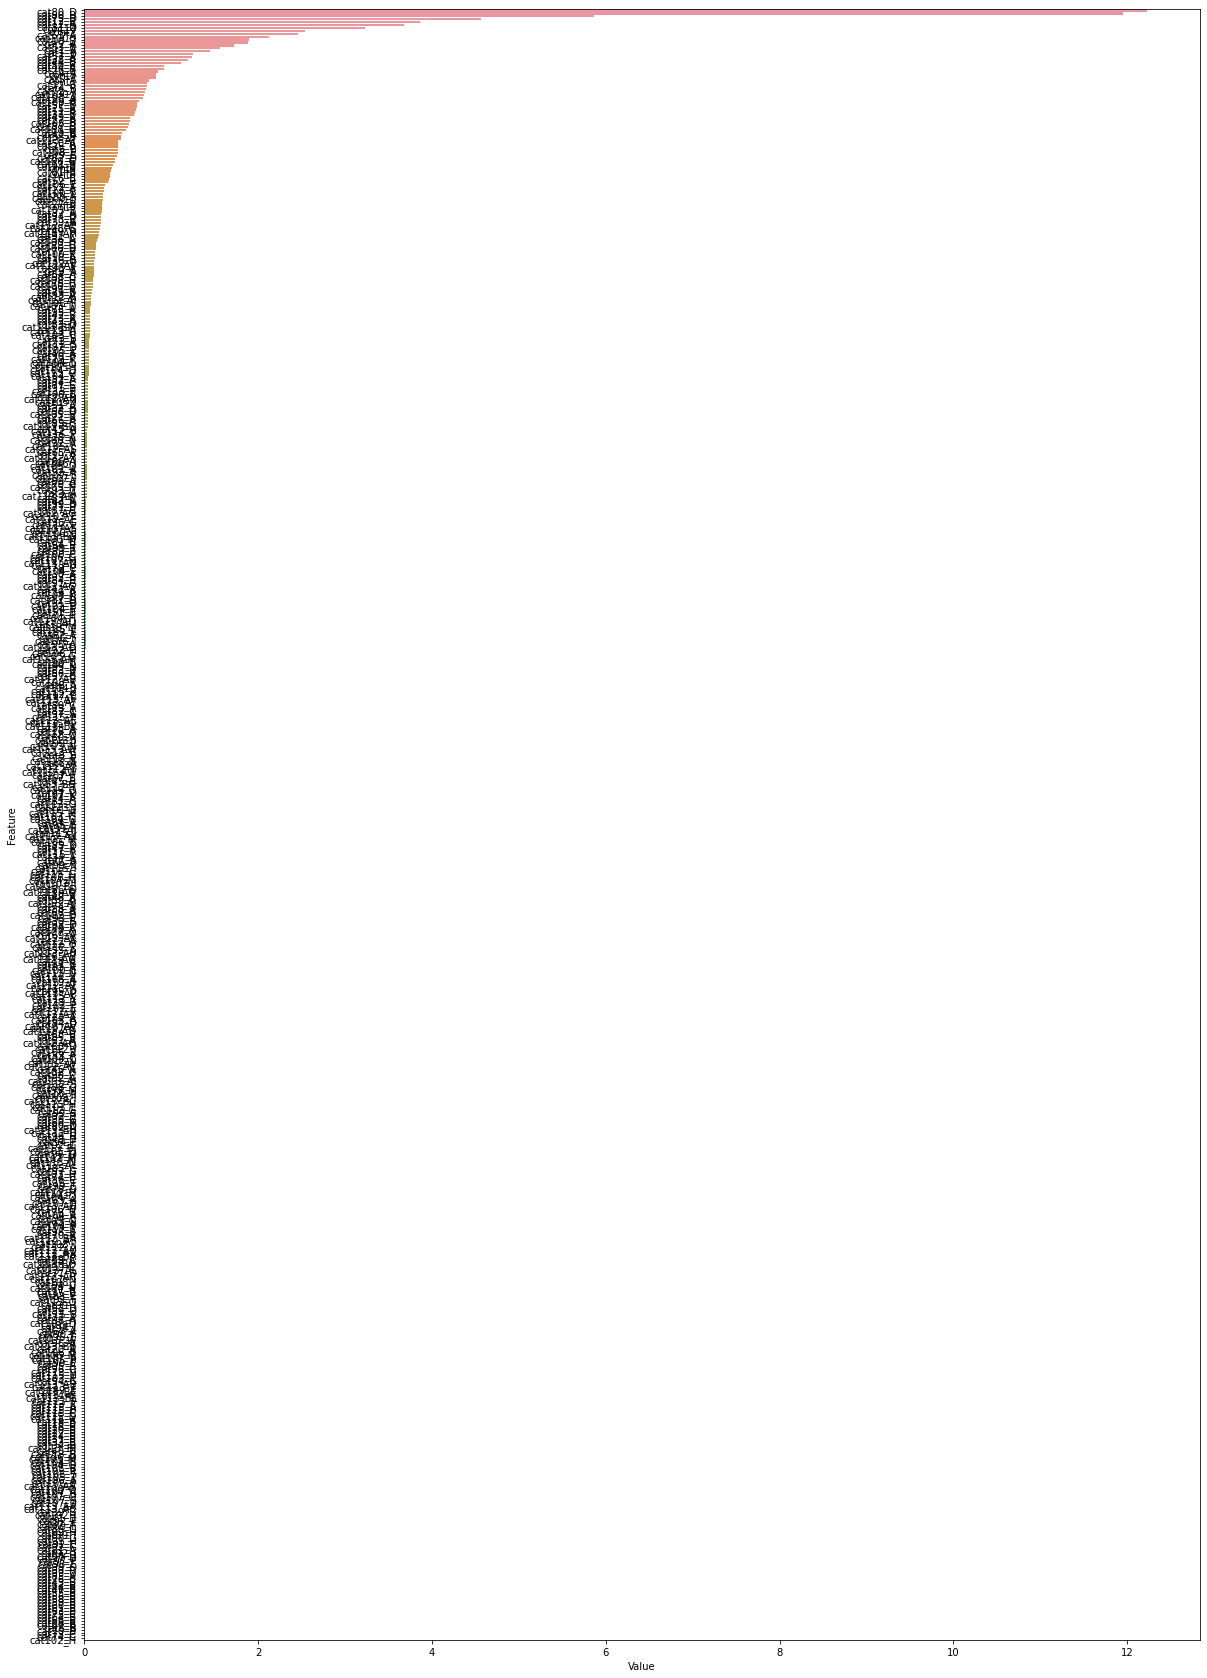

In [38]:
feature_imp = pd.DataFrame(sorted(zip(model_cat.feature_importances_,x.columns)), columns=['Value','Feature'])

fig,ax = plt.subplots(1,1,figsize=(20,30))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False), ax=ax)